In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
clean_data = pd.read_parquet("gs://my-dataproc-staging-bucket/Data_ETL/clean_hospital_data.parquet")

In [3]:
clean_data

,Unnamed: 0,HOSP_NIS,YEAR,AGE,GENDER,RACE,ELECTIVE,AWEEKEND,DIED,H_CONTRL,...,CMR_CANCER_SOLID,CMR_DEMENTIA,CMR_DEPRESS,CMR_HTN_CX,CMR_HTN_UNCX,CMR_LUNG_CHRONIC.1,CMR_PERIVASC,CMR_THYROID_HYPO,CMR_THYROID_OTH,LOS
0,0,50385,2021,20,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,33
1,1,50378,2021,62,0,1,0,0,0,2,...,0,0,1,0,0,0,0,1,0,26
2,2,30454,2021,50,0,1,0,0,0,2,...,0,0,0,0,0,1,0,0,0,24
3,3,50568,2021,55,0,2,0,0,0,2,...,0,0,0,0,0,0,0,0,0,57
4,4,70434,2021,67,0,1,0,0,0,3,...,0,0,0,1,0,1,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6666747,6666747,80033,2021,40,0,1,0,1,0,3,...,0,0,0,0,0,0,0,0,0,9
6666748,6666748,10104,2021,63,0,1,0,0,1,2,...,0,0,0,1,0,0,0,0,0,12
6666749,6666749,10131,2021,75,1,1,0,0,1,2,...,0,0,0,1,0,0,0,0,0,4
6666750,6666750,40008,2021,25,0,6,0,0,0,2,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# First check if columns exist
columns_to_drop = ['Unnamed: 0']
existing_columns = [col for col in columns_to_drop if col in clean_data.columns]

if existing_columns:
    clean_data.drop(columns=existing_columns, inplace=True)

In [5]:
clean_data.columns

Index(['HOSP_NIS', 'YEAR', 'AGE', 'GENDER', 'RACE', 'ELECTIVE', 'AWEEKEND',
       'DIED', 'H_CONTRL', 'HOSP_REGION', 'CMR_AIDS', 'CMR_ALCOHOL',
       'CMR_OBESE', 'CMR_DIAB_UNCX', 'CMR_DIAB_CX', 'CMR_LUNG_CHRONIC',
       'CMR_DRUG_ABUSE', 'CMR_AUTOIMMUNE', 'CMR_CANCER_LYMPH',
       'CMR_CANCER_LEUK', 'CMR_CANCER_METS', 'CMR_CANCER_NSITU',
       'CMR_CANCER_SOLID', 'CMR_DEMENTIA', 'CMR_DEPRESS', 'CMR_HTN_CX',
       'CMR_HTN_UNCX', 'CMR_LUNG_CHRONIC.1', 'CMR_PERIVASC',
       'CMR_THYROID_HYPO', 'CMR_THYROID_OTH', 'LOS'],
      dtype='object')

In [6]:

# First split: 80% train+validation, 20% test
X = clean_data.drop('LOS', axis=1)  # Features
y = clean_data['LOS']               # Target

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Second split: 75% train, 25% validation (from remaining 80%)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)

# Final split ratios:
# Train: 60% (0.8 * 0.75)
# Validation: 20% (0.8 * 0.25) 
# Test: 20%

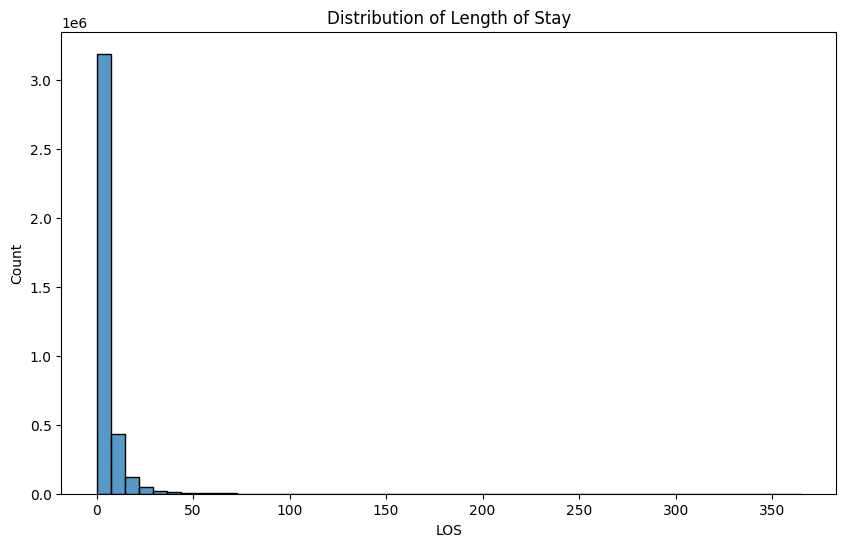

/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/conda/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Improved R2 Score: 0.070
Improved RMSE: 4.233

Feature Importance:
              feature  coefficient
1                 AGE     0.630256
4                DIED     0.357114
3         CMR_DIAB_CX     0.337140
6            ELECTIVE    -0.245602
2          CMR_HTN_CX     0.208789
9              GENDER    -0.200242
5        CMR_DEMENTIA     0.123504
7    CMR_LUNG_CHRONIC     0.063901
8  CMR_LUNG_CHRONIC.1     0.063901
0                YEAR     0.000000


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Check target distribution
plt.figure(figsize=(10,6))
sns.histplot(y_train, bins=50)
plt.title('Distribution of Length of Stay')
plt.show()

# 2. Remove outliers
def remove_outliers(X, y, threshold=3):
    scaler = StandardScaler()
    z_scores = np.abs(scaler.fit_transform(y.values.reshape(-1,1)))
    mask = z_scores < threshold
    return X[mask.reshape(-1)], y[mask.reshape(-1)]

X_clean, y_clean = remove_outliers(X_train, y_train)

# 3. Feature selection based on correlation
correlations = []
for column in X_clean.columns:
    corr = np.corrcoef(X_clean[column], y_clean)[0,1]
    correlations.append((column, abs(corr)))

important_features = [col for col, corr in sorted(correlations, key=lambda x: abs(x[1]), reverse=True)][:10]
X_selected = X_clean[important_features]

# 4. Split and scale
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
    X_selected, y_clean, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_new)
X_test_scaled = scaler.transform(X_test_new)

# 5. Rebuild model
model = LinearRegression()
model.fit(X_train_scaled, y_train_new)

# 6. Evaluate
y_pred = model.predict(X_test_scaled)
print(f'Improved R2 Score: {r2_score(y_test_new, y_pred):.3f}')
print(f'Improved RMSE: {np.sqrt(mean_squared_error(y_test_new, y_pred)):.3f}')

# 7. Feature importance
importance = pd.DataFrame({
    'feature': important_features,
    'coefficient': model.coef_
})
print("\nFeature Importance:")
print(importance.sort_values(by='coefficient', key=abs, ascending=False))

## Feature Engineering 

In [ ]:
# 1. Feature Engineering
X_train['AGE_squared'] = X_train['AGE'] ** 2
X_train['interaction_age_comorbid'] = X_train['AGE'] * X_train['CMR_LUNG_CHRONIC']

# 2. Try polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# 3. Add regularization
from sklearn.linear_model import Ridge
model = Ridge(alpha=1.0)
model.fit(X_train_poly, y_train)

# 4. Evaluate
y_pred = model.predict(X_test_poly)
print(f'Ridge R2 Score: {r2_score(y_test, y_pred):.3f}')
print(f'Ridge RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}')